# HW 4: Unsupervised Learning, K-Means Clustering
### CS 4824 / ECE 4484, Spring '21

Code inspired by submissions to the [Credit Card Dataset for Clustering](https://www.kaggle.com/arjunbhasin2013/ccdata) Kaggle competition.

---

In [1]:
# standard imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# special from sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Start by checking out our data
data = pd.read_csv("creditcards.csv")
print(f"{data.shape[0]} rows, {data.shape[1]} columns")

8950 rows, 17 columns


In [3]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


## Test and time your solution

In [4]:
import time
# Import and run your solution!
from custom_kmeans import CustomKMeans

K = 5
tic = time.perf_counter()
# custom_labels = CustomKMeans(K).fit(data) #uncomment it
custom_labels = KMeans(K).fit(data) #comment it for your solution
toc = time.perf_counter()
print(f"Clustered {data.shape[0]} datapoints in {toc - tic:0.4f} seconds")

Clustered 8950 datapoints in 0.2098 seconds


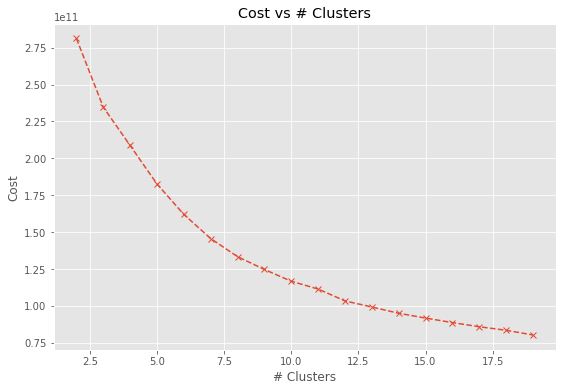

In [5]:
# For choosing best K
sum_of_distances = []
max_k = 20
for k in range(2, max_k):
# ===== Toggle the comment below to see sklearn's implementation =====
#     kmean = custom_kmeans(k).fit(data)
    kmean = KMeans(k).fit(data) 
# ====================================================================
    sum_of_distances.append(kmean.inertia_)

# Plot the cost vs number of clusters
fig = plt.figure(figsize=(9,6))
plt.plot(range(2, max_k), sum_of_distances, '--x')
plt.title("Cost vs # Clusters")
plt.xlabel("# Clusters")
plt.ylabel('Cost')
plt.show()

In [6]:
# ============ Uncomment when ready to save labels file ============ 
K = 4
labels = KMeans(K).fit(data).labels_
pd.DataFrame(labels).to_csv('labels.csv', index=False)
# ==================================================================

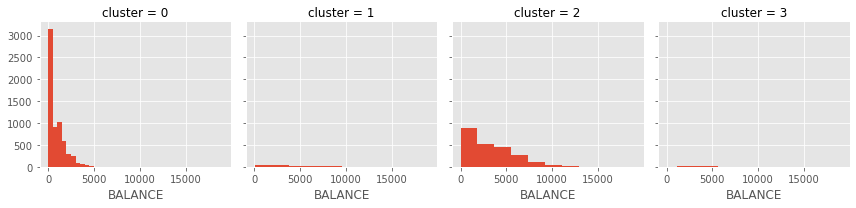

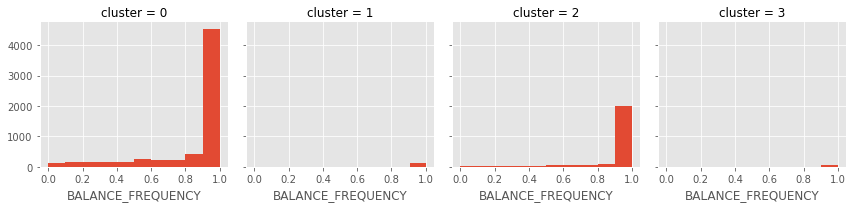

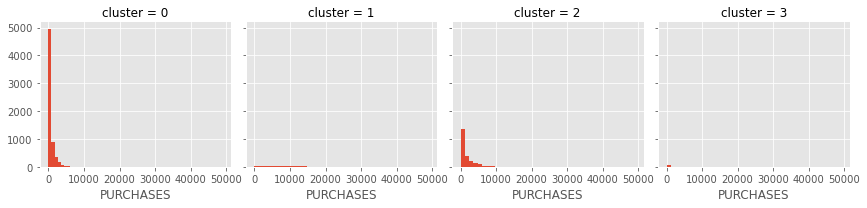

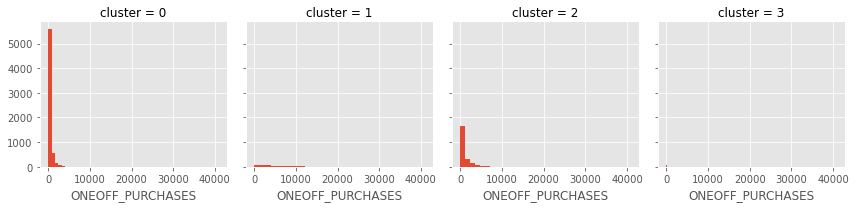

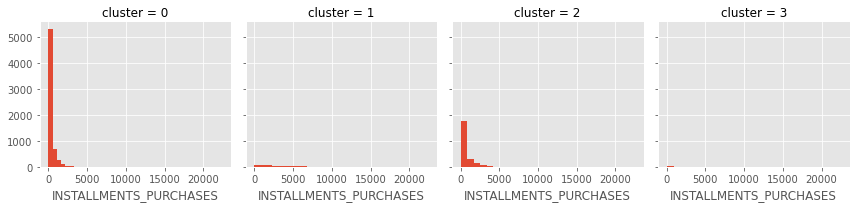

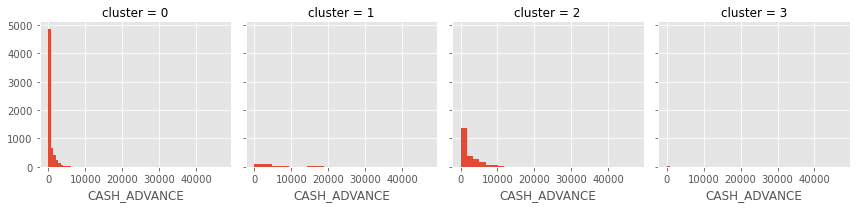

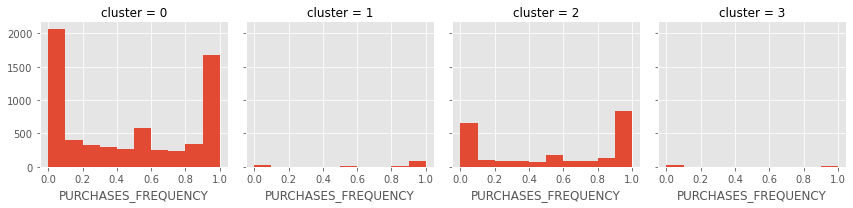

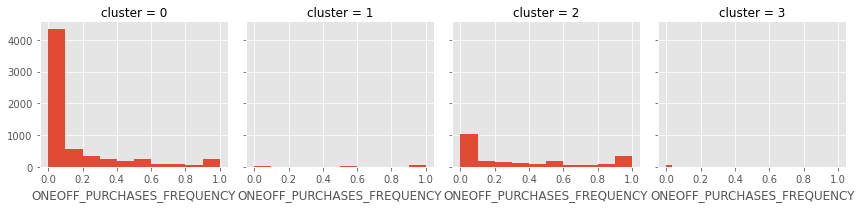

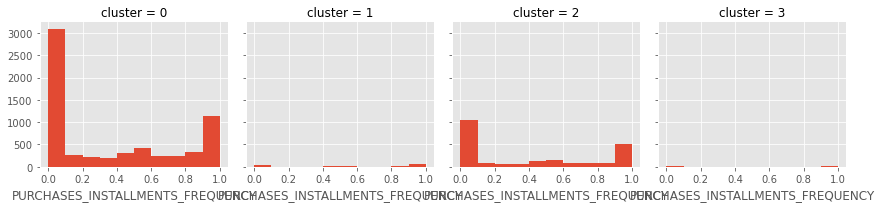

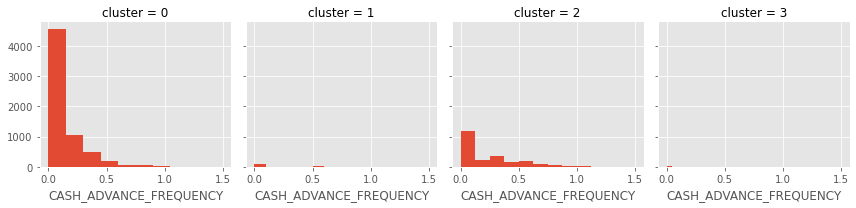

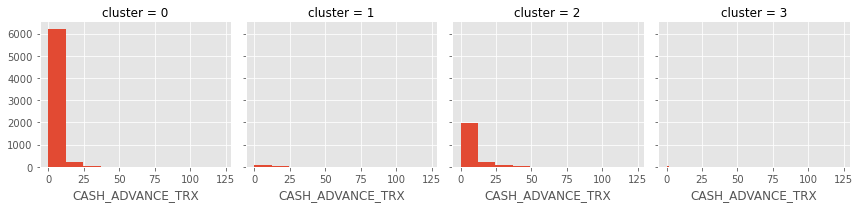

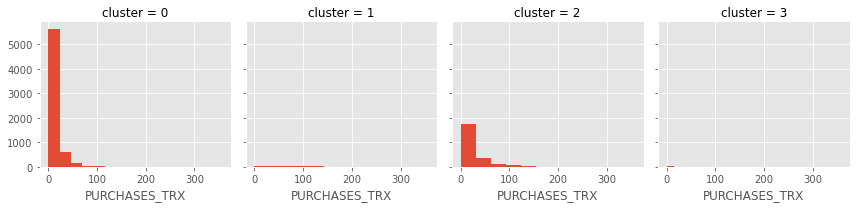

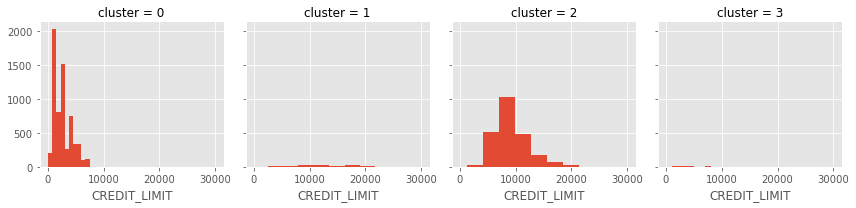

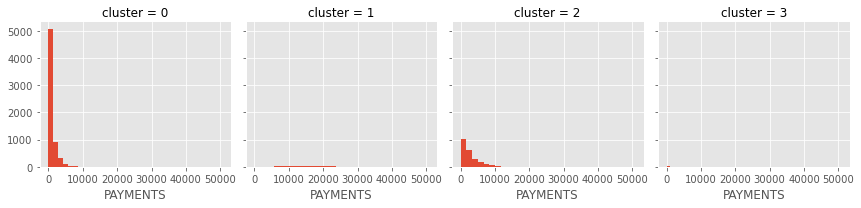

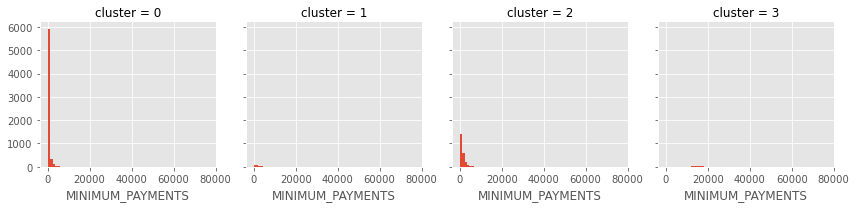

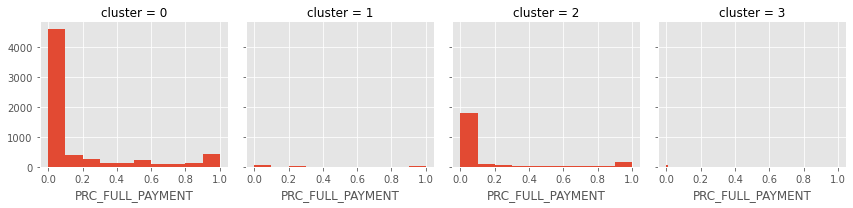

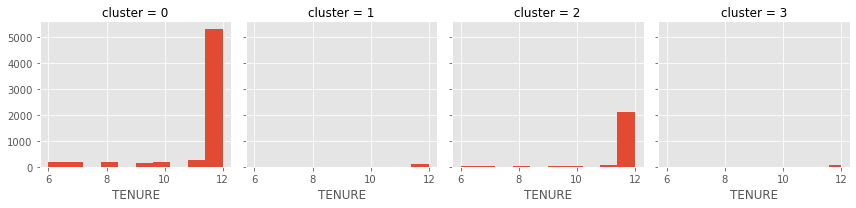

In [7]:
labeled_data = data.copy()
labeled_data['cluster'] = labels

for c in labeled_data:
    if c == 'cluster': continue
    grid=sns.FacetGrid(labeled_data, col='cluster')
    grid.map(plt.hist, c)

## Interpreting your clusters

In [8]:
#  extract top two principal components
data_pca = pd.DataFrame(PCA(2).fit_transform(data))
data_pca.columns = ['PC1', 'PC2']
data_pca['cluster'] = labels

# add something here so the students can replace [0,1,2,3,4] with english interpretations (strings)
interpretations = {
    0: "foo",
    1: "bar",
    2: "fizz",
    3: 'buzz'
}
for key, value in interpretations.items():
    data_pca['cluster'].replace(key, value, inplace=True)

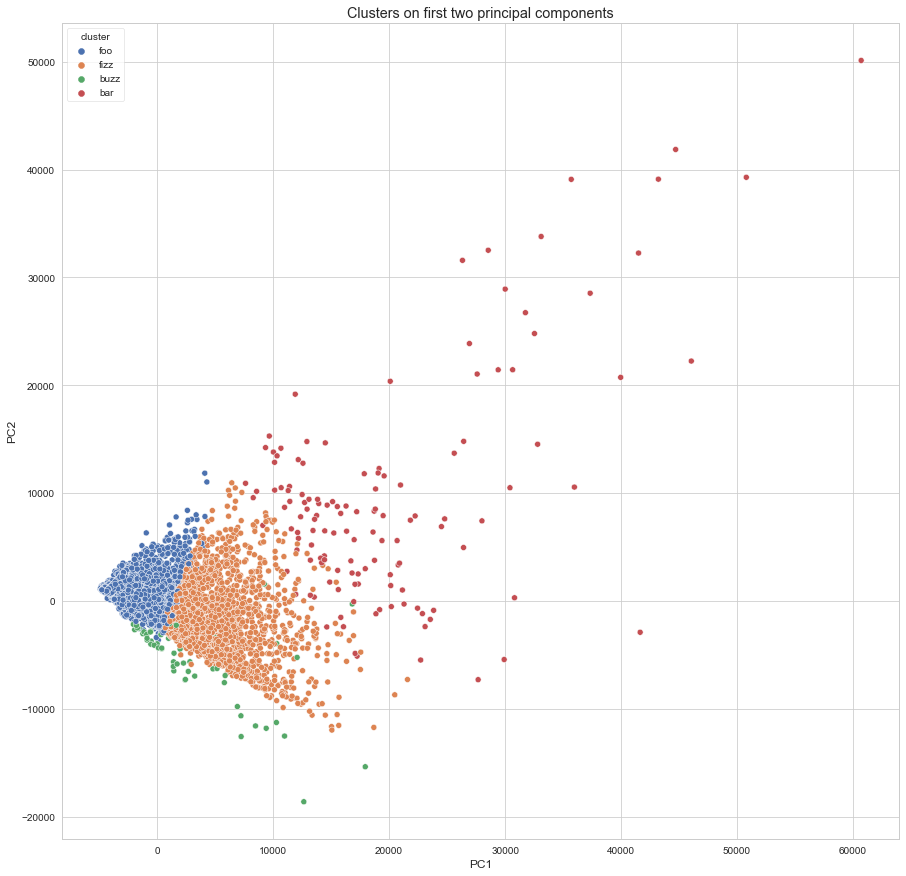

In [10]:
#  graph the data with seaborn
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,15))

sns.scatterplot(data=data_pca, x='PC1', y='PC2', hue='cluster', palette='deep')

#  label and display!
plt.title("Clusters on first two principal components")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()